# Datos descargados de: https://www.pmel.noaa.gov/tao/drupal/disdel/ 



---


# PERFIL VERTICAL DE "TEMPERATURA SUB SUPERFICIAL DEL MAR" DE LA BOYA UBICADA EN 0N - 170W 

---



In [ ]:
import warnings # Omitir mensajes de advertencia
warnings.filterwarnings("ignore")

In [ ]:
# Trabajamos en colab: 
from google.colab import drive 
drive.mount('/content/drive/')

import os

path = '/content/drive/MyDrive/Colab Notebooks/OCEANOGRAFIA/' # Directorio de trabajo
os.chdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import xarray as xr 

In [ ]:
Tsub = xr.open_dataset(path + 'BOYA 0N170W/Tsub_0N170W.cdf',
                       drop_variables = ['time_bnds','ST_6020','QT_5020','ZSST_2003','depzsst']) # Eliminamos variable inservibles.
Tsub['time'] = pd.date_range('1988-05-16', '2023-04-01', freq = 'D')
Tsub

<xarray.Dataset>
Dimensions:  (time: 12739, depth: 20, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 1988-05-16 1988-05-17 ... 2023-04-01
  * depth    (depth) float32 1.0 5.0 9.0 10.0 13.0 ... 200.0 250.0 300.0 500.0
  * lat      (lat) float32 0.0
  * lon      (lon) float32 190.0
Data variables:
    T_20     (time, depth, lat, lon) float32 ...
Attributes:
    platform_code:                0n170w
    site_code:                    0n170w
    wmo_platform_code:            51010
    array:                        TAO/TRITON
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                14:27  3-APR-2023

In [ ]:
# En este caso vamos a eliminar lat y lon ya que no lo utilizaremos: 
# Selecciona solo las dimensiones que deseas mantener (time y depth)
ds = Tsub.sel(lat=Tsub.lat, lon=Tsub.lon, method='nearest')

# Elimina las dimensiones que no deseas (lat y lon)
ds = ds.squeeze(drop=True)
ds

<xarray.Dataset>
Dimensions:  (time: 12739, depth: 20)
Coordinates:
  * time     (time) datetime64[ns] 1988-05-16 1988-05-17 ... 2023-04-01
  * depth    (depth) float32 1.0 5.0 9.0 10.0 13.0 ... 200.0 250.0 300.0 500.0
Data variables:
    T_20     (time, depth) float32 ...
Attributes:
    platform_code:                0n170w
    site_code:                    0n170w
    wmo_platform_code:            51010
    array:                        TAO/TRITON
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                14:27  3-APR-2023



---


# CALCULAMOS EL PROMEDIO HISTÓRICO DIARIO 

---



In [ ]:
ds_prom = ds.sel(time=slice('1988-05-16', '2023-04-01')).groupby('time.dayofyear').mean(dim='time')
ds_prom

<xarray.Dataset>
Dimensions:    (depth: 20, dayofyear: 366)
Coordinates:
  * depth      (depth) float32 1.0 5.0 9.0 10.0 13.0 ... 200.0 250.0 300.0 500.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    T_20       (dayofyear, depth) float32 27.57 27.16 nan ... 12.98 11.7 8.316
Attributes:
    platform_code:                0n170w
    site_code:                    0n170w
    wmo_platform_code:            51010
    array:                        TAO/TRITON
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                14:27  3-APR-2023

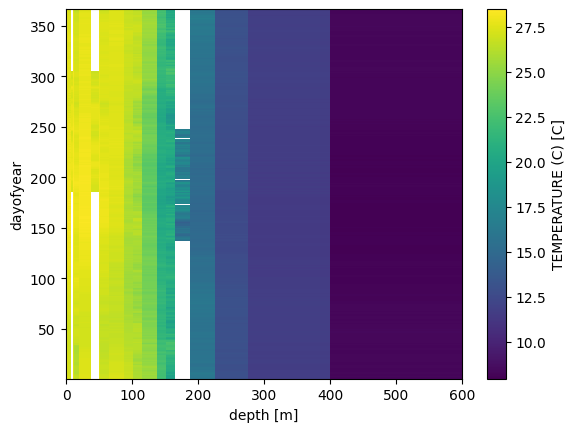

In [ ]:
# Observamos que por defecto las profundidades se posicionan en el EJE X.
# Necesitamos que se posicione en el EJE Y. Además existen datos vacíos, por lo que necesitamos
# realizar una interpolación 
ds_prom.T_20.plot()

In [ ]:
# Eliminamos las profundidades con pocos datos (Menos de 5000 datos)
profundidades_eliminar = [5.,   9.,  10.,  13.,  49.,  53., 103., 153., 175]

# Eliminamos y la asignamos a la misma variable del promedio histórico 
ds_prom = ds_prom.drop_sel(depth=profundidades_eliminar)

# Transponer las dimensiones para que depth vaya primero
ds_prom = ds_prom.transpose('depth', 'dayofyear')
ds_prom['T_20']

<xarray.DataArray 'T_20' (depth: 11, dayofyear: 366)>
array([[27.568914 , 27.545143 , 27.578833 , ..., 27.605106 , 27.602598 ,
        27.225769 ],
       [27.499096 , 27.495165 , 27.517164 , ..., 27.498468 , 27.521624 ,
        27.255161 ],
       [27.5066   , 27.51498  , 27.536842 , ..., 27.497204 , 27.487272 ,
        27.199518 ],
       ...,
       [12.909729 , 12.980568 , 13.010929 , ..., 13.0260315, 12.949535 ,
        12.984313 ],
       [11.710172 , 11.709291 , 11.715145 , ..., 11.713647 , 11.700001 ,
        11.69828  ],
       [ 8.28279  ,  8.257169 ,  8.305273 , ...,  8.246639 ,  8.294139 ,
         8.315618 ]], dtype=float32)
Coordinates:
  * depth      (depth) float32 1.0 25.0 50.0 75.0 ... 200.0 250.0 300.0 500.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Attributes:
    name:            T
    long_name:       TEMPERATURE (C)
    generic_name:    temp
    FORTRAN_format:  f10.2
    units:           C
    epic_code:       20

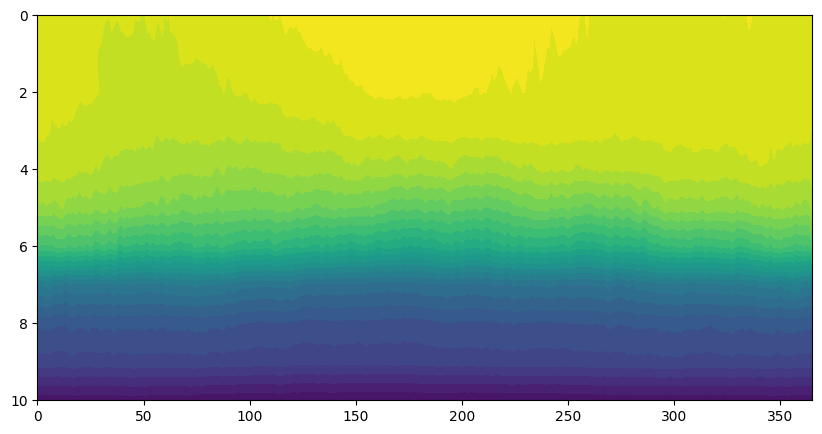

In [ ]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(10,5))
ax.contourf(ds_prom.T_20,29);
# Invertimos el eje y
ax.invert_yaxis()

In [ ]:
import numpy as np
from scipy.interpolate import interp2d

In [ ]:
# Vamos a realizar la interpolación de los datos de temperatura: 
# Seleccionamos las variables 
timeday = ds_prom.dayofyear.values # len: 366 
temp = ds_prom.T_20.values # len: 11
pres = ds_prom.depth.values # len: 11
prei = np.arange(5, 505, 5) # len: 100 

# Creamos una función de interpolación lineal
interp_func = interp2d(timeday, pres, temp) # pres y temp deben de tener la misma longitud 

# Interpolamos en los nuevos puntos
interp_temp = interp_func(timeday, prei) # len: 100 



---
# GRAFICAMOS 

---




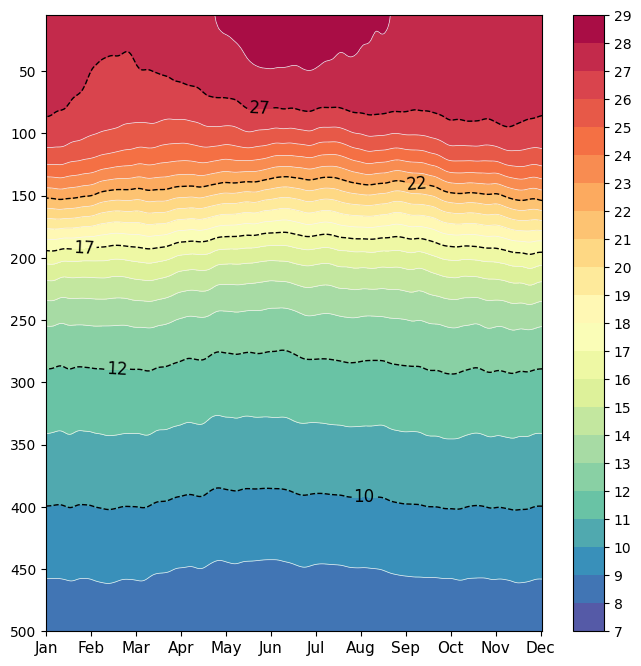

In [ ]:
from scipy.ndimage import gaussian_filter
import datetime

fig, ax = plt.subplots(figsize=(8, 8))

# Definir niveles de temperatura
levels = np.arange(7, 30, 1)
# ----------------------------------------------------------------------------------------- 
# Suavizado de contornos y countor fill 
sigma = 3
interp_temp_smooth = gaussian_filter(interp_temp, sigma=sigma)
# ----------------------------------------------------------------------------------------- 
# Graficar mapa de colores suavizado
cs = ax.contourf(ds_prom.dayofyear, prei, interp_temp_smooth, levels, cmap="Spectral_r")

# Definir niveles de las líneas de contorno
black_levels = [10, 12, 17, 22, 27]
grey_levels = [level for level in levels if level not in black_levels]

# Aplicar un suavizado a las líneas de contorno
cs2 = ax.contour(ds_prom.dayofyear, prei, interp_temp_smooth, colors='black', levels=black_levels, linewidths=1, linestyles='--')
cs3 = ax.contour(ds_prom.dayofyear, prei, interp_temp_smooth, colors='whitesmoke', levels=grey_levels, linewidths=0.5, linestyles='-')

# Agregar etiquetas a las líneas de contorno
ax.clabel(cs2, fmt='%2.0f', colors='black', fontsize=12)
# ----------------------------------------------------------------------------------------- 
# Invertir el eje y y establecer límites y escala del eje y
ax.invert_yaxis()
ax.set_ylim(500, 5)
ax.set_yticks(range(50, 501, 50))
# ----------------------------------------------------------------------------------------- 
# Agregar barra de colores
cbar = fig.colorbar(cs, ax=ax, ticks=np.arange(7, 31, 1))
# ----------------------------------------------------------------------------------------- 
# Cambiar etiquetas del eje x a los nombres de los meses
months = [datetime.date(2000, m, 1).strftime('%b') for m in range(1, 13)]
ax.set_xticks(np.linspace(1, 365, num=12))
ax.set_xticklabels(months, fontsize = 11)
# ----------------------------------------------------------------------------------------- 
# Mostrar gráfico
plt.show()




---
# Los datos utilizados se encuentran en el siguiente link: 
https://drive.google.com/drive/u/0/folders/1h6Zx1Xf3JztHvRN6L_TMBlB1SVhiHf6a



---

